<a href="https://colab.research.google.com/github/vasilenkopit/Docs/blob/master/%D0%94%D0%97_2__%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Закачка файла. Установка библиотек

In [ ]:
!wget -O "industry.xls" "https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2021-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-03-30&revision_date=2021-03-30&nd=1939-01-01"

--2021-03-31 16:51:49--  https://fred.stlouisfed.org/graph/fredgraph.xls?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IPG2211A2N&scale=left&cosd=1939-01-01&coed=2021-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-03-30&revision_date=2021-03-30&nd=1939-01-01
Resolving fred.stlouisfed.org (fred.stlouisfed.org)... 23.73.248.63
Connecting to fred.stlouisfed.org (fred.stlouisfed.org)|23.73.248.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56832 (56K) [application/vnd.ms-excel]
Saving to: ‘industry.xls’

industry.xls        100%[===================>]  55.50K  --.-KB/s    in 0.009s  

2021-03-31 16:51:49 (6.07 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('industry.xls', skiprows=10)
data.columns

Index(['observation_date', 'IPG2211A2N'], dtype='object')

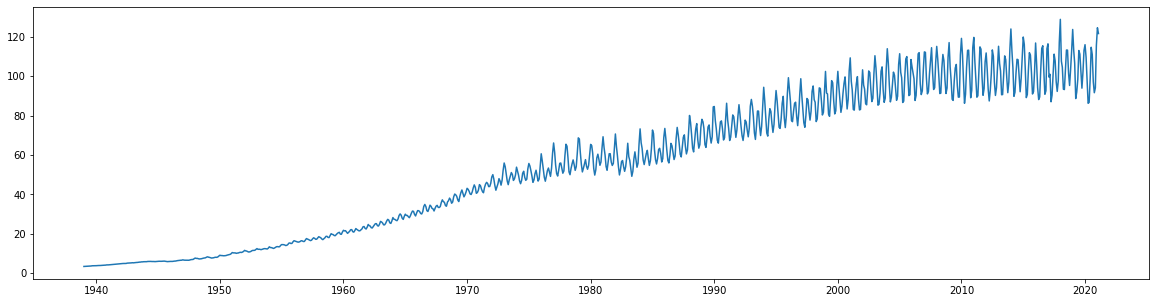

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']

plt.figure(figsize=(20, 5))
plt.plot(x, y)

# 2. Весь период


# 2.1. Скользящая

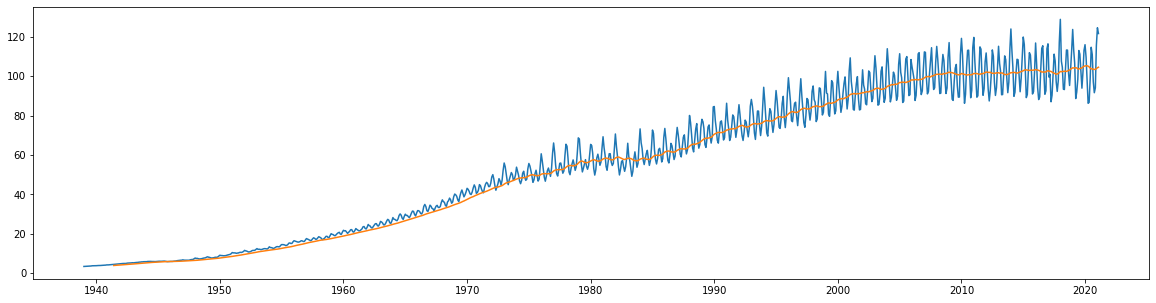

In [ ]:
#Можно упростить весь график за весь период с помощью скользящей, чтобы избавиться от "Пилы"

data['IPG2211A2N'].rolling(30).mean()
data['rolling_mean_30'] = data['IPG2211A2N'].rolling(30).mean()

x = data['observation_date']

plt.figure(figsize=(20, 5))
plt.plot(x, data['IPG2211A2N'])
plt.plot(x, data['rolling_mean_30'])

# 3. За период 2000-2020 г

In [ ]:
# Более информативно будет наблюдать на ф-ии максимума, минимума, гистограмму, 
# квантиль, автокорреляцию, сезонность, тренд  на обрезанном графике

start_date = pd.Timestamp(year=2000, month=1,day=1)
end_date  = pd.Timestamp(year=2020, month=12, day=31)
condition = (data['observation_date'] < end_date) & (start_date < data['observation_date'])
data_short = data[condition]
data_short = data_short.reset_index(drop=True)
data_short

,observation_date,IPG2211A2N,rolling_mean_30
0,2000-02-01,94.5218,88.221253
1,2000-03-01,88.3463,88.426793
2,2000-04-01,81.6662,88.558113
3,2000-05-01,84.7235,88.639557
4,2000-06-01,91.3293,88.605123
...,...,...,...
246,2020-08-01,111.0092,103.791487
247,2020-09-01,97.1503,103.544110
248,2020-10-01,91.6317,103.483530
249,2020-11-01,94.1304,103.513193


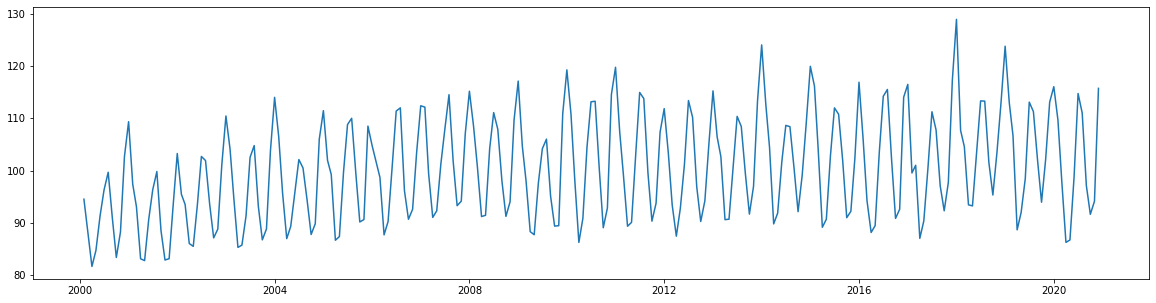

In [ ]:
x = data_short['observation_date']
y = data_short['IPG2211A2N']

plt.figure(figsize=(20, 5))
plt.plot(x, y)

# 3.1. Функиции максимума, минимума, среднее значение

In [ ]:
data_short['IPG2211A2N'].min(), data_short['IPG2211A2N'].max(), data_short['IPG2211A2N'].mean()

(81.6662, 128.9071, 100.141615936255)

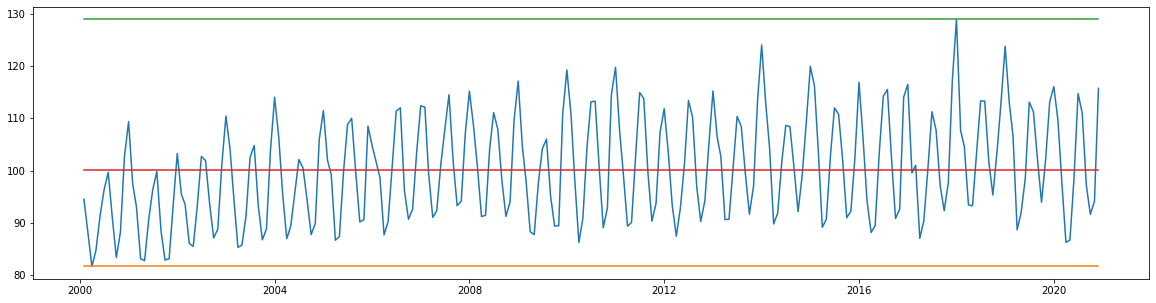

In [ ]:
data_short['min'] = data_short['IPG2211A2N'].min()
data_short['max'] = data_short['IPG2211A2N'].max()
data_short['mean'] = data_short['IPG2211A2N'].mean()

x = data_short['observation_date']

plt.figure(figsize=(20, 5))
plt.plot(x, data_short['IPG2211A2N'])
plt.plot(x, data_short['min'])
plt.plot(x, data_short['max'])
plt.plot(x, data_short['mean'])

# 3.2. Гистограмма, квантиль


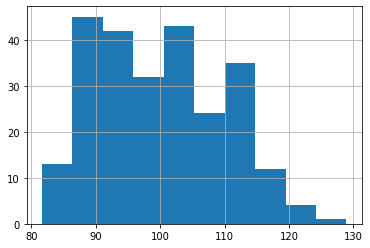

In [ ]:
data_short['IPG2211A2N'].hist()

In [ ]:
data_short['IPG2211A2N'].quantile(0.95)

115.6063

In [ ]:
data_short['IPG2211A2N'].quantile(0.05)

86.47489999999999

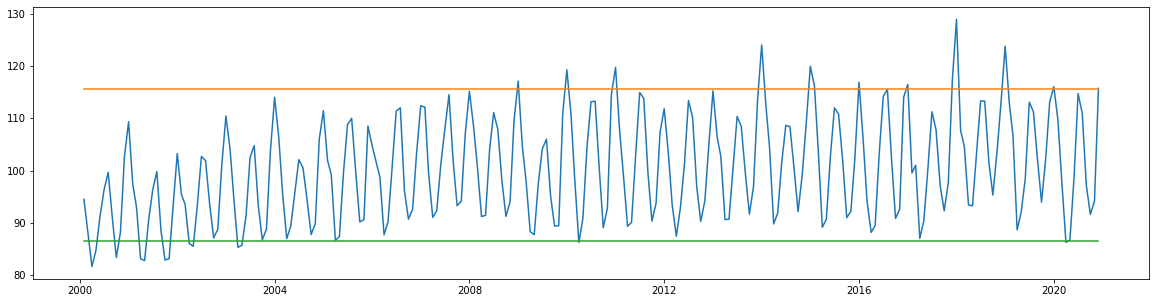

In [ ]:
data_short['quantile95'] = data_short['IPG2211A2N'].quantile(0.95)
data_short['quantile05'] = data_short['IPG2211A2N'].quantile(0.05)

x = data_short['observation_date']

plt.figure(figsize=(20, 5))
plt.plot(x, data_short['IPG2211A2N'])
plt.plot(x, data_short['quantile95'])
plt.plot(x, data_short['quantile05'])

# 3.3. Автокорреляция, сезонность

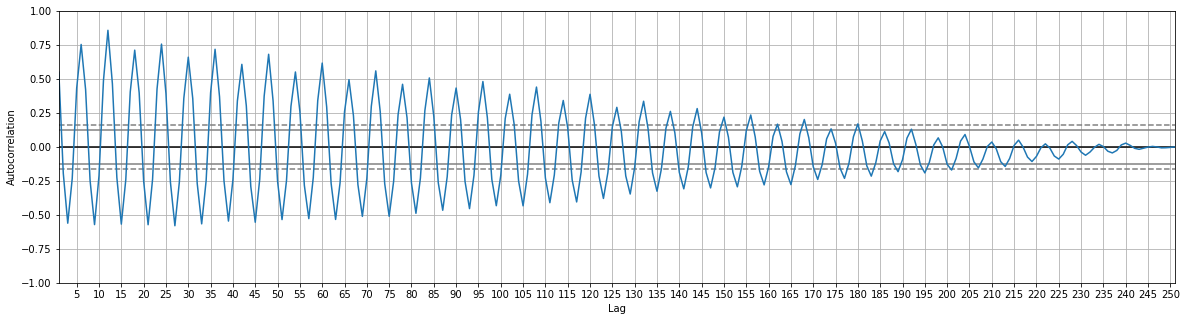

In [ ]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_short['IPG2211A2N'].dropna())
plt.locator_params(axis='x', nbins=75)

# 3.4. Тренд

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
data_clean = data_short[data_short['IPG2211A2N'].notna()]

In [ ]:
X = pd.DataFrame(data_clean.index)
y = data_clean['IPG2211A2N']

In [ ]:
model = LinearRegression()  
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
trend = model.predict(X)

In [ ]:
trend

array([ 94.66834142,  94.71212762,  94.75591382,  94.79970001,
        94.84348621,  94.88727241,  94.9310586 ,  94.9748448 ,
        95.01863099,  95.06241719,  95.10620339,  95.14998958,
        95.19377578,  95.23756197,  95.28134817,  95.32513437,
        95.36892056,  95.41270676,  95.45649295,  95.50027915,
        95.54406535,  95.58785154,  95.63163774,  95.67542393,
        95.71921013,  95.76299633,  95.80678252,  95.85056872,
        95.89435492,  95.93814111,  95.98192731,  96.0257135 ,
        96.0694997 ,  96.1132859 ,  96.15707209,  96.20085829,
        96.24464448,  96.28843068,  96.33221688,  96.37600307,
        96.41978927,  96.46357546,  96.50736166,  96.55114786,
        96.59493405,  96.63872025,  96.68250645,  96.72629264,
        96.77007884,  96.81386503,  96.85765123,  96.90143743,
        96.94522362,  96.98900982,  97.03279601,  97.07658221,
        97.12036841,  97.1641546 ,  97.2079408 ,  97.25172699,
        97.29551319,  97.33929939,  97.38308558,  97.42

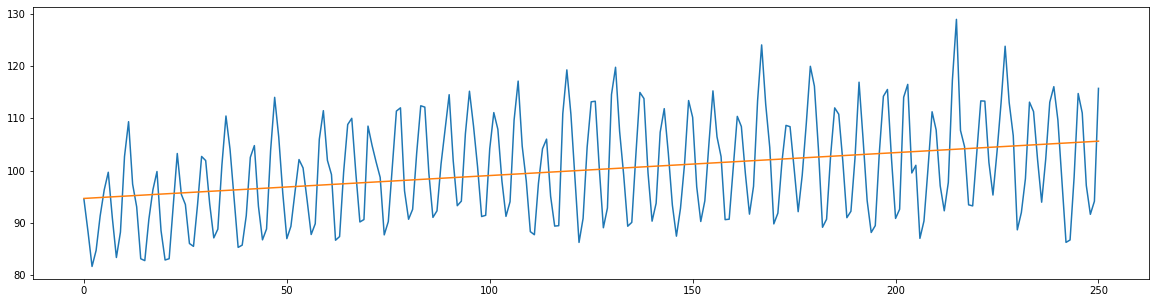

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data_clean.index, data_clean['IPG2211A2N'])
plt.plot(data_clean.index, trend)

In [ ]:
last_val = trend[-1] # последнее значение
last_val

105.61489044773286

In [ ]:
first_val = trend[0]  # первое значение
first_val

94.66834142477707

In [ ]:
(last_val - first_val)/first_val # прирост в процентах

0.11563051446986487

# Заключение

In [ ]:
# Были использованны исключительно информативные функции которые могут выдать информацию для данного графика
# Наиболее целесообразно использовать данные функции для конкретного периода, т.к. за весь период наблюдается
# максимальное изменение, и информации вынесенная данными фукциями будет малоинтересна.  
# При необходимости можно изменить период.
# Корреляция параметров в данном случае не допустима, т.к. нет еще одного столбца данными.